In [1]:
! pip install gensim

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.0 MB 14.7 MB/s eta 0:00:02
   --- ------------------------------------ 2.1/24.0 MB 14.7 MB/s eta 0:00:02
   -------- ------------------------------- 5.2/24.0 MB 8.6 MB/s eta 0:00:03
   ---------- ----------------------------- 6.3/24.0 MB 8.4 MB/s eta 0:00:03
   ------------ --------------------------- 7.6/24.0 MB 7.3 MB/s eta 0:00:03
   ------------- -------------------------- 8.1/24.0 MB 6.5 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/24.0 MB 6.0 MB/s eta 0:00:03
   -------------- ------------------------- 8.7/24.0 MB 5.5 MB/s eta 0:00:03
   --------------- ------------------------ 9.2/24.0 MB 4.9 MB/s eta 0:00:04
   ---------------- ----------------------- 9.7/24.0 MB 4.6 MB/s eta 0:00:04
   ----------------- ---------------------- 10.2/24.0 MB 4.4 MB/s eta 0:00:04
   ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

import gensim.downloader as api #This module is an API for downloading, getting information and loading datasets/models

from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#gensim is used to download pre trained embedding like GlOve and word2v


model = api.load('glove-wiki-gigaword-100') #'word2vec-google-news-300', 'glove-twitter-200'

[==================================================] 100.0% 128.1/128.1MB downloaded


In [4]:
#convert sentence to vector
def get_sentence_vector(sentence):
  words = [word for word in sentence.lower().split() if word in model]   #words which are in sentence and also in model
  if not words:
    return np.zeros(model.vector_size) #if not a valid word returns a zero vector
  return np.mean([model[word] for word in words], axis=0)
  #computed the average of all words vectors to get a single sentence vector
  #semantic center is captured by average

In [5]:
#segmenting/grouping similar sentences

tasks = [
    "clean the data", "build the model", "train the algorithm", "remove outliers", "The movie was good", "sayarra sucks", "everyone was crying",
    "deploy model", "visualize data", "tune hyperparameters", "generate report", "exploratory data analysis"
]


task_vectors = [get_sentence_vector(task) for task in tasks]

In [6]:
len(task_vectors)

12

In [7]:
task_vectors  # sentence ko vector me change kr diye 

[array([-0.349398  ,  0.31428334,  0.57264334, -0.4571433 ,  0.21657066,
        -0.28722066, -0.3860233 ,  0.31294   , -0.22445667,  0.28296968,
         0.55556995, -0.05512334,  0.07664467, -0.1501    ,  0.01548334,
         0.09911668,  0.49118337,  0.00773053, -0.05413999, -0.15718   ,
        -0.11038009, -0.12730333,  0.38019666, -0.10735634, -0.33076334,
        -0.28085998, -0.1753    , -0.15538667, -0.50088996,  0.08953366,
         0.15874933,  0.24834669, -0.25819367,  0.29464665,  0.15412666,
        -0.03834634, -0.12354001,  0.07568   ,  0.05891666, -0.19611602,
        -0.38599333, -0.6856167 , -0.2522767 , -0.09421333, -0.08685199,
         0.3090833 ,  0.13088001, -0.33256   , -0.178689  , -0.73147327,
         0.29631266,  0.12933066,  0.13313998,  0.94937664, -0.17422998,
        -2.2714667 ,  0.132451  , -0.05069001,  2.0112    ,  0.20724332,
        -0.24158667,  0.33394468, -0.297942  ,  0.28351668,  0.87144333,
         0.19100332,  0.09242501, -0.1965    ,  0.4

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state=0)
labels = kmeans.fit_predict(task_vectors)

In [11]:
labels

array([1, 2, 2, 3, 0, 4, 0, 2, 1, 0, 1, 1])

In [12]:
for i, label in enumerate(labels):
    print(f"Cluster {label}: {tasks[i]}")

Cluster 1: clean the data
Cluster 2: build the model
Cluster 2: train the algorithm
Cluster 3: remove outliers
Cluster 0: The movie was good
Cluster 4: sayarra sucks
Cluster 0: everyone was crying
Cluster 2: deploy model
Cluster 1: visualize data
Cluster 0: tune hyperparameters
Cluster 1: generate report
Cluster 1: exploratory data analysis


In [13]:
documents = [
    "Dogs are wonderful pets",
    "Cats are independent animals",
    "Dogs love to play fetch",
    "Cats love to nap",
    "Football is a great sport",
    "Soccer is popular worldwide",
]

doc_vectors = [get_sentence_vector(doc) for doc in documents]
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(doc_vectors)

for i, label in enumerate(clusters):
    print(f"Cluster {label}: {documents[i]}")


Cluster 0: Dogs are wonderful pets
Cluster 0: Cats are independent animals
Cluster 0: Dogs love to play fetch
Cluster 0: Cats love to nap
Cluster 1: Football is a great sport
Cluster 1: Soccer is popular worldwide


In [14]:
#semantic search>>>how similar sentences are


corpus = [
    "Deep is a good student, he lives in delhi. He studies dsai",
    "Himani is very curious",
    "data visualisation is easy",
    "best practice for data visualisation"
]


query = "visualising data"


query_vec = get_sentence_vector(query)

In [15]:
query_vec

array([-0.266187  ,  0.15080999,  0.248555  ,  0.307705  ,  0.166403  ,
       -0.43979198, -0.43158   , -0.19314   ,  0.19914499, -0.11438   ,
        0.3668775 , -0.24623   , -0.0028485 , -0.33638   ,  0.4574255 ,
        0.407556  ,  0.20137   ,  0.165722  ,  0.47472   ,  0.10339999,
       -0.5602    , -0.28419   ,  0.07429001, -0.07708   , -0.59295005,
       -0.62144   ,  0.13441   ,  0.14528799, -0.3516585 ,  0.2853905 ,
        0.1627    , -0.07675   , -0.52499   ,  0.185885  ,  0.2519445 ,
       -0.40495   , -0.30406   ,  0.04239   ,  0.24667999, -0.342785  ,
       -0.1621215 , -0.21058   , -0.4694195 ,  0.51438   , -0.58134   ,
       -0.00518   ,  0.29452002, -0.31173   , -0.0692585 , -0.315045  ,
        0.662265  ,  0.14916   ,  0.06490999,  0.326745  ,  0.29939002,
       -0.60677004,  0.20003149, -0.29853   ,  0.96247995, -0.03326   ,
       -0.277665  ,  0.0592065 , -0.007177  , -0.122505  ,  0.007705  ,
        0.37536   , -0.130787  , -0.27879   ,  0.64656496, -0.05

In [16]:
corpus_vec = [get_sentence_vector(doc) for doc in corpus]

In [17]:
cosine_similarity([query_vec], corpus_vec)[0]

array([0.27161884, 0.20026734, 0.7210859 , 0.6375422 ], dtype=float32)

In [18]:
sims = cosine_similarity([query_vec], corpus_vec)[0]

results = sorted(zip(corpus, sims), key=lambda x: x[1], reverse=True)
print("Semantic Search Results:")
for doc, score in results:
  print(f"{score:.3f}: {doc}")

Semantic Search Results:
0.721: data visualisation is easy
0.638: best practice for data visualisation
0.272: Deep is a good student, he lives in delhi. He studies dsai
0.200: Himani is very curious


In [19]:
#word2vec
#fast text, cbow and skip gram
#cbow>> target word using context
#skipgram >> vice versa of cbow
#fast text >> subwords as well (negative sampling)


In [20]:
from gensim.models import FastText

corpus = [
    "The quick brown fox jumps over the lazy dog",
    "I love learning natural language processing",
    "FastText uses character n-grams to improve embedding quality",
    "Word embeddings help in many NLP tasks",
    "Dogs are better than cats for some people",
    "I enjoy solving problems with machine learning"
]


tokenized_words = [sentence.lower().split() for sentence in corpus]

In [21]:
tokenized_words

[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
 ['i', 'love', 'learning', 'natural', 'language', 'processing'],
 ['fasttext',
  'uses',
  'character',
  'n-grams',
  'to',
  'improve',
  'embedding',
  'quality'],
 ['word', 'embeddings', 'help', 'in', 'many', 'nlp', 'tasks'],
 ['dogs', 'are', 'better', 'than', 'cats', 'for', 'some', 'people'],
 ['i', 'enjoy', 'solving', 'problems', 'with', 'machine', 'learning']]

In [22]:
cbow_model = FastText(sentences=tokenized_words, vector_size=100, window = 5, min_count=1, epochs=100, sg =0)
#sg = 0 is CBOW
#SG = 1 is skip gram model

In [23]:
cbow_model.wv["quick"]# wv >> word vector 

array([-5.1758543e-04,  2.4426566e-03,  3.4177534e-03,  6.9449167e-04,
       -7.4837741e-04, -4.8423174e-04, -1.6232030e-04, -2.3534382e-03,
        1.3565499e-03, -1.8147322e-03, -1.1222417e-03, -8.1815937e-04,
        3.9949031e-03,  3.8320111e-04, -3.4395928e-04,  7.9357845e-04,
        1.5779341e-03,  7.8293809e-04, -1.3431166e-03,  1.1844130e-03,
       -4.4718385e-05, -3.3475023e-03,  1.3498758e-04, -5.6298635e-05,
       -3.4551648e-03, -1.7221623e-04,  7.5419247e-04, -7.1166555e-04,
       -1.7074592e-04, -9.4690622e-04,  1.0509406e-03, -8.6828170e-04,
        1.7160055e-03, -7.6809278e-07, -1.5009417e-03,  2.8500599e-03,
       -1.5250172e-03, -2.3731417e-03, -7.2716654e-04,  6.1210542e-04,
        1.6050217e-03,  1.0680363e-03,  6.3206657e-04,  1.1291055e-03,
       -6.5710314e-04,  6.6588068e-04, -1.0242364e-03, -2.8443200e-04,
       -1.6568354e-04, -1.0823325e-03, -2.9837948e-03, -2.8590993e-03,
       -2.7634560e-03, -1.0129695e-03,  7.3958101e-04,  2.3512586e-03,
      

In [24]:
cbow_model.wv.most_similar('learn', topn=3) #for subwords or any words

[('learning', 0.3682992160320282),
 ('for', 0.2570675313472748),
 ('the', 0.1847514659166336)]

In [25]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences = tokenized_words, vector_size=100, window=5, min_count=1, sg = 1, negative=10, epochs=100) #sg=1 is ski[pgrap and 0 cbow]

In [26]:
w2v_model.wv["brown"]

array([ 1.1130621e-02, -1.0982939e-02, -7.1903635e-03,  4.9143867e-03,
        4.6074707e-03, -8.1705432e-03,  5.3292261e-03,  1.4135695e-02,
       -9.3823029e-03, -1.1245508e-02, -3.9259247e-03, -8.1235049e-03,
        2.6964401e-03,  1.4585576e-02,  5.1771710e-03, -2.5178790e-03,
        7.3379683e-03,  6.9272183e-03,  8.8873701e-03, -8.5392554e-04,
        7.6523293e-03, -7.3006251e-03, -9.0180570e-04, -6.7719012e-03,
        7.1289293e-03, -1.7629940e-03, -1.1813759e-02,  9.8466594e-03,
        6.9369543e-03, -5.5872765e-04,  1.2799471e-02, -3.0630757e-03,
       -8.6750957e-04, -8.2856510e-03, -1.6459629e-03, -2.8122321e-04,
        5.1294616e-03,  5.7832799e-03,  4.9457592e-03, -9.8094037e-03,
       -4.8999363e-03, -9.4641056e-03,  7.5019766e-03,  7.3555424e-03,
       -1.6874884e-03, -1.8302599e-03, -7.2730673e-03, -3.0651705e-03,
        1.2354967e-02, -3.4641681e-04, -4.3019541e-03, -7.7989530e-03,
       -4.4048144e-03, -5.4691726e-04,  3.4402420e-03,  1.0151545e-02,
      

In [27]:
w2v_model.wv.most_similar("dogs", topn=3)

[('the', 0.4701727032661438),
 ('uses', 0.4059242010116577),
 ('brown', 0.4016493260860443)]

In [28]:
#problem statement>> given a sentence canm you predict the rating

data = [
    ("I loved the movie, it was fantastic!", "positive", 4.5),
    ("The movie was okay, not the best.", "neutral", 3.0),
    ("Terrible movie. Wouldn’t recommend.", "negative", 1.2),
    ("Really enjoyed the characters and plot.", "positive", 4.7),
    ("It was boring and predictable.", "negative", 2.0),
    ("An average film, not too bad.", "neutral", 3.2)
]


sentences = [text.lower().split() for text, _, _ in data]
scores = [score for _, _, score in data]

In [29]:
sentences

[['i', 'loved', 'the', 'movie,', 'it', 'was', 'fantastic!'],
 ['the', 'movie', 'was', 'okay,', 'not', 'the', 'best.'],
 ['terrible', 'movie.', 'wouldn’t', 'recommend.'],
 ['really', 'enjoyed', 'the', 'characters', 'and', 'plot.'],
 ['it', 'was', 'boring', 'and', 'predictable.'],
 ['an', 'average', 'film,', 'not', 'too', 'bad.']]

In [30]:
scores

[4.5, 3.0, 1.2, 4.7, 2.0, 3.2]

In [31]:
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=2, epochs=100)

In [32]:
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = [sentence_vector(tokens, w2v_model) for tokens in sentences]

In [33]:
X

[array([-0.00758844,  0.00656532, -0.00219557, -0.00104192, -0.00077175,
        -0.00728545, -0.00052133,  0.00148822, -0.00480634, -0.00174292,
        -0.0004048 , -0.00040235, -0.00603101,  0.00027429,  0.00039445,
         0.00130209,  0.00708828,  0.01212355, -0.00502501, -0.00626089,
         0.00628579,  0.00190821,  0.00819578,  0.00332773,  0.00689962,
         0.00350042, -0.00457936,  0.00715582, -0.0052755 , -0.00189156,
         0.0005626 ,  0.00090723,  0.00909322, -0.00586953,  0.00036433,
        -0.00573825,  0.00775584,  0.00389649, -0.00108454, -0.00111831,
        -0.00148571, -0.0050239 , -0.00465321,  0.00057032,  0.00699484,
        -0.00308778,  0.00059398, -0.00065592,  0.00476033,  0.00183369],
       dtype=float32),
 array([-0.002288  , -0.00100013,  0.00184799,  0.0049034 , -0.00636986,
        -0.00294869,  0.00994841,  0.00363949, -0.01144282, -0.00252878,
         0.00496692, -0.00265516, -0.00057841, -0.00101519, -0.00253251,
        -0.00374267,  0.004

In [35]:
y = scores
y

[4.5, 3.0, 1.2, 4.7, 2.0, 3.2]

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


reg = Ridge()
reg.fit(X, y)

y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"MSE on training data: {mse:.3f}")

MSE on training data: 1.557


In [37]:
new_review = "excellen movie"
new_tokens = new_review.lower().split()
new_vec = sentence_vector(new_tokens, w2v_model)
predicted_score = reg.predict([new_vec])[0]
print(f"Predicted Score for Review: \"{new_review}\" → {predicted_score}")

Predicted Score for Review: "excellen movie" → 3.0992765806346814



📁 Document Clusters:

Cluster 0:
  - Terrible acting. Couldn't finish watching.
  - A masterpiece with great emotional depth.
  - Very bad movie. Poorly executed.
  - Predictable plot twists. Nothing new to offer.

Cluster 1:
  - It was a boring and predictable movie.
  - A heartwarming story that touched my soul.
  - An exciting thriller that kept me on edge.
  - An inspiring film with powerful messages.
  - Mediocre at best. I expected more.
  - Too many clichés and weak character development.
  - A cinematic experience I won’t forget.
  - Fails to deliver on the hype.
  - A fun ride with lots of laughs.
  - Dragged on forever. I lost interest halfway.
  - Just plain bad. Don't waste your time.
  - It had moments, but overall forgettable.
  - A gem of a movie. Highly recommended!

Cluster 2:
  - Absolutely loved this movie! The story was brilliant.
  - The cinematography and the music were amazing.
  - Fantastic performances by the entire cast.
  - The plot was confusing and slow.
 

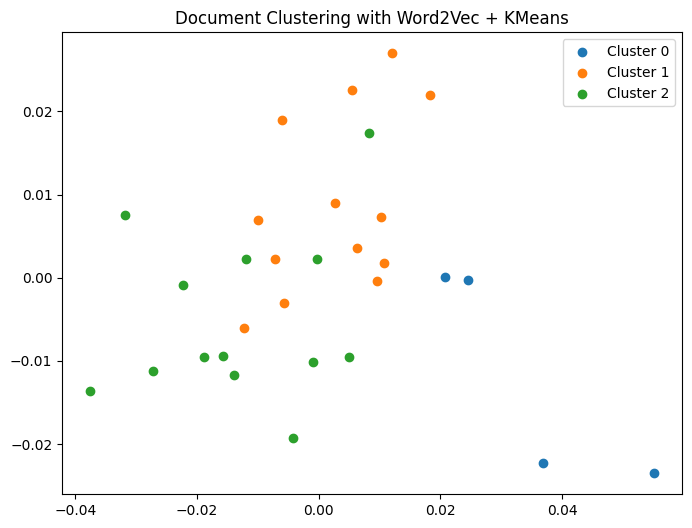

In [38]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Sample dataset (feel free to replace with your own!)
documents = [
    "Absolutely loved this movie! The story was brilliant.",
    "The cinematography and the music were amazing.",
    "It was a boring and predictable movie.",
    "Fantastic performances by the entire cast.",
    "The plot was confusing and slow.",
    "A heartwarming story that touched my soul.",
    "Terrible acting. Couldn't finish watching.",
    "An exciting thriller that kept me on edge.",
    "Not my cup of tea. Very slow pacing.",
    "The direction and screenplay were top-notch.",
    "A masterpiece with great emotional depth.",
    "Very bad movie. Poorly executed.",
    "An inspiring film with powerful messages.",
    "Mediocre at best. I expected more.",
    "Great visuals but the story lacked impact.",
    "Loved the dialogues and the chemistry between leads.",
    "Too many clichés and weak character development.",
    "One of the best films I've seen this year.",
    "The editing was sloppy and disjointed.",
    "A cinematic experience I won’t forget.",
    "Fails to deliver on the hype.",
    "Stellar performances but the plot was underwhelming.",
    "A fun ride with lots of laughs.",
    "Dragged on forever. I lost interest halfway.",
    "Impressive production design and art direction.",
    "Very emotional and beautifully shot.",
    "Just plain bad. Don't waste your time.",
    "It had moments, but overall forgettable.",
    "A gem of a movie. Highly recommended!",
    "Predictable plot twists. Nothing new to offer."
]

# Step 2: Preprocessing
tokenized_docs = [doc.lower().split() for doc in documents]

# Step 3: Train Word2Vec
w2v_model = Word2Vec(tokenized_docs, vector_size=50, window=5, min_count=1, workers=2, epochs=100)

# Step 4: Convert each document to a vector (average of word vectors)
def get_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X = np.array([get_doc_vector(doc, w2v_model) for doc in tokenized_docs])

# Step 5: KMeans Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Step 6: Print clustered documents
print("\n📁 Document Clusters:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    for idx, label in enumerate(labels):
        if label == i:
            print(f"  - {documents[idx]}")

# Step 7: Optional - Visualize clusters using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_reduced[labels == i, 0], X_reduced[labels == i, 1], label=f"Cluster {i}")
plt.title("Document Clustering with Word2Vec + KMeans")
plt.legend()
plt.show()

# doc2vec
## concept of tagging are called as doc2 vec

# otherwise cbow and skip gram both work similarly as doc2 vec

In [39]:
#doc2vec

from gensim.models.doc2vec import Doc2Vec, TaggedDocument


data = [
    "AI is transforming healthcare",
    "Natural language processing is fascinating",
    "Self-driving cars rely on sensors",
    "Chatbots improve customer service",
    "Computer vision powers facial recognition",
    "Robotics is revolutionizing manufacturing"
]

tagged_data = [TaggedDocument(words=d.split(), tags=[str(i)]) for i, d in enumerate(data)]

In [40]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_data) #build the vocanulary
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [41]:
model.infer_vector(["deep", "learning"])

array([ 0.00887458, -0.00716031,  0.00247435,  0.00877779,  0.00201849,
        0.00792901,  0.00847877, -0.00888802,  0.00086621,  0.0040937 ,
       -0.00411845,  0.00286114, -0.00985229, -0.00877471,  0.00500209,
        0.00026391,  0.00528078, -0.00519688, -0.00794747, -0.0002667 ,
        0.00727568, -0.00690999,  0.00650543, -0.00893234, -0.00133386,
        0.00240785, -0.00552656,  0.00364123, -0.00831738,  0.00888039,
       -0.00048603, -0.00661315,  0.00289832,  0.00246724, -0.00461792,
       -0.00232284,  0.00865239, -0.00045469, -0.00602271,  0.00226839,
        0.00472102, -0.00573129,  0.00086102, -0.00821431, -0.00055592,
       -0.00421671, -0.00140943, -0.007446  , -0.00286164,  0.00207281],
      dtype=float32)

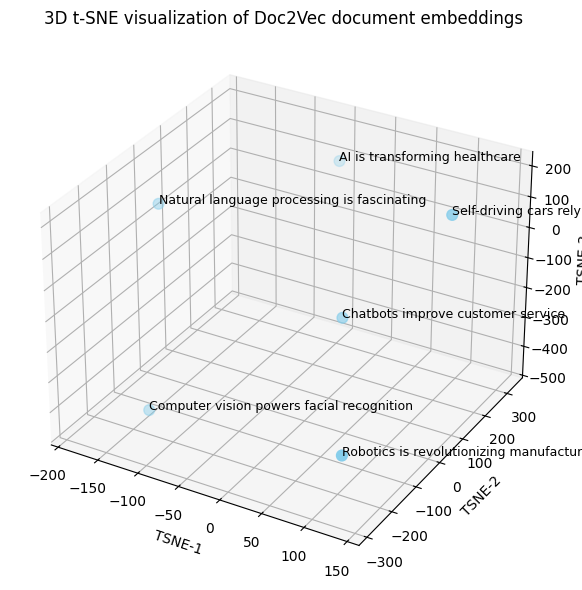

In [42]:
from sklearn.manifold import TSNE

# Get document vectors as a NumPy array
vectors = np.array([model.dv[str(i)] for i in range(len(tagged_data))])

# 3D t-SNE Visualization
tsne = TSNE(n_components=3, random_state=42, perplexity=2)
reduced = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c='skyblue', s=60)

for i, txt in enumerate(data):
    ax.text(reduced[i, 0], reduced[i, 1], reduced[i, 2], txt, fontsize=9)

ax.set_title("3D t-SNE visualization of Doc2Vec document embeddings")
ax.set_xlabel("TSNE-1")
ax.set_ylabel("TSNE-2")
ax.set_zlabel("TSNE-3")
plt.tight_layout()
plt.show()

In [43]:
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import re

# Step 1: Load Pre-trained Word Embeddings
print("⏳ Loading GloVe embeddings...")
word_vectors = api.load("glove-wiki-gigaword-50")
print("✅ Loaded.")

# Step 2: Extended Data (text, sentiment)
data = [
    ("I loved the movie, it was fantastic!", "positive"),
    ("The movie was okay, not the best.", "neutral"),
    ("Terrible movie. Wouldn’t recommend.", "negative"),
    ("Really enjoyed the characters and plot.", "positive"),
    ("It was boring and predictable.", "negative"),
    ("An average film, not too bad.", "neutral"),
    ("What a masterpiece, absolutely loved it!", "positive"),
    ("Poor acting and bad script. Waste of time.", "negative"),
    ("Nothing special, just another average film.", "neutral"),
    ("Incredible visuals and emotional story.", "positive"),
    ("Couldn't even finish it. So bad.", "negative"),
    ("Neither good nor bad. Just meh.", "neutral"),
    ("Brilliant performance by the lead actor!", "positive"),
    ("The plot was weak and unoriginal.", "negative"),
    ("Mediocre at best, not memorable.", "neutral"),
    ("Exceeded my expectations. A must-watch!", "positive"),
    ("The direction was sloppy and confusing.", "negative"),
    ("Some parts were good, others not so much.", "neutral")
]

# Step 3: Preprocessing and Sentence Vectorization
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text.split()

def sentence_vector(sentence):
    words = preprocess(sentence)
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if not vectors:
        return np.zeros(word_vectors.vector_size)
    return np.mean(vectors, axis=0)

# Step 4: Create Training Data
X = [sentence_vector(text) for text, _ in data]
y = [label for _, label in data]

# Step 5: Train Classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Step 6: Predict New Review
new_review = "The plot was weak and unoriginal"
new_vec = sentence_vector(new_review)
predicted_label = clf.predict([new_vec])[0]
print(f"\n🔍 Predicted Sentiment for Review: \"{new_review}\" → {predicted_label}")

⏳ Loading GloVe embeddings...
[==================================================] 100.0% 66.0/66.0MB downloaded
✅ Loaded.

🔍 Predicted Sentiment for Review: "The plot was weak and unoriginal" → negative
